# **INSTALLING ALL THE REQUIRED LIBRARIES**

In [1]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable


# IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import imutils 

In [6]:
import easyocr

# Reading the Image

In [7]:
img = cv2.imread('.\\train\Cars418.png')
print(img)

NameError: name 'cv2' is not defined

# Converting the Image into the GRAY Scale FORMAT

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

NameError: name 'cv2' is not defined

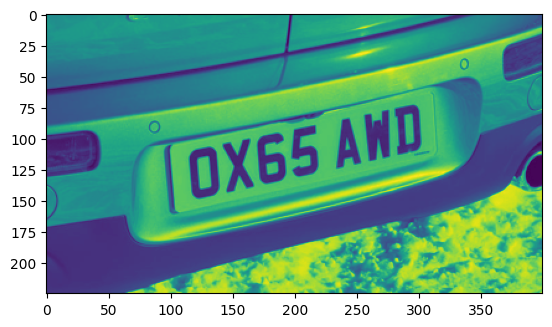

In [186]:
plt.imshow(gray)

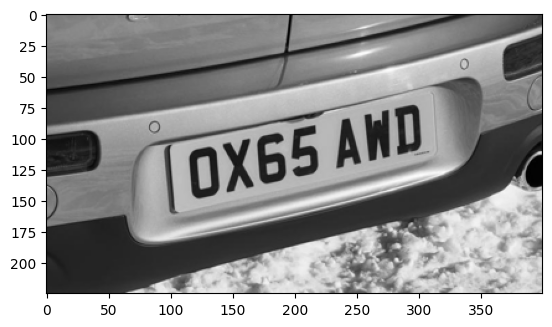

In [187]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# APPLYING FILTERING TO REMOVE THE NOISE FROM THE IMAGE, ALONG WITH THE EDGE DETECTION, WHICH ENABLES US TO FIND EDGES WITH IN THE IMAGE

In [188]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [189]:
edged = cv2.Canny(bfilter, 30, 200)

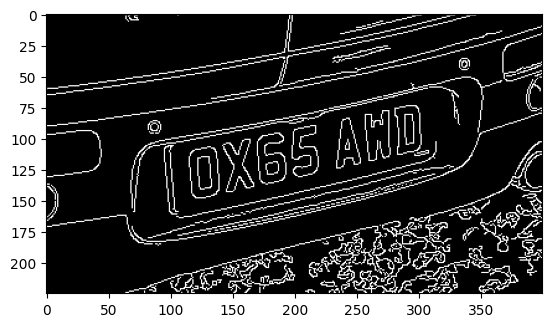

In [190]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [192]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [193]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [194]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [195]:
print(contours)

[array([[[130, 107]],

       [[129, 108]],

       [[125, 108]],

       [[124, 109]],

       [[120, 109]],

       [[119, 110]],

       [[118, 110]],

       [[116, 112]],

       [[116, 114]],

       [[115, 115]],

       [[115, 123]],

       [[116, 124]],

       [[116, 134]],

       [[117, 135]],

       [[117, 144]],

       [[118, 145]],

       [[118, 146]],

       [[120, 148]],

       [[128, 148]],

       [[129, 147]],

       [[132, 147]],

       [[133, 146]],

       [[135, 146]],

       [[136, 145]],

       [[137, 145]],

       [[137, 144]],

       [[139, 142]],

       [[139, 129]],

       [[138, 128]],

       [[138, 117]],

       [[137, 116]],

       [[137, 111]],

       [[136, 110]],

       [[136, 109]],

       [[135, 108]],

       [[133, 108]],

       [[132, 107]]], dtype=int32), array([[[129, 108]],

       [[130, 107]],

       [[132, 107]],

       [[133, 108]],

       [[134, 108]],

       [[136, 110]],

       [[136, 111]],

       [[137, 112

In [217]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  # peri = cv2.arcLength(contour, True)
  approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
  if len(approx) == 4:
    location = approx
    break

In [218]:
print(location)

None


In [215]:
mask = np.zeros(gray.shape, np.uint8)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [216]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


In [200]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

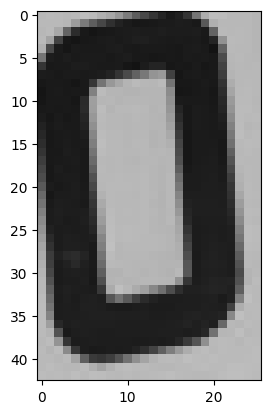

In [204]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [179]:
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


In [181]:
print(result[0][0])

IndexError: list index out of range

In [182]:
print(result[0][1])

IndexError: list index out of range

In [81]:
text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [82]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)

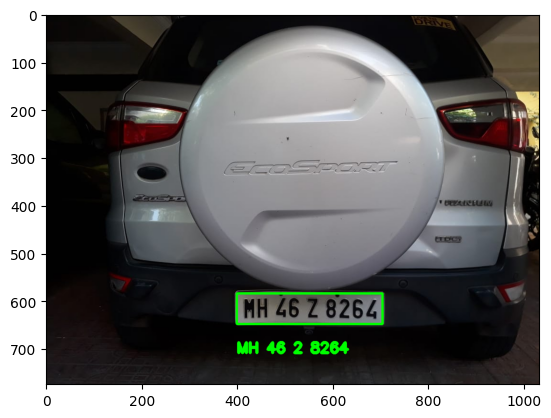

In [83]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))